## Simulate three-wave mixing effect for chirality detection using data from Nature 497 (2013) 475
Here we recycle codes from the previous exercises "Compute rotational energy levels of rigid water molecule" and "Compute Stark effect for rotational levels of water molecule" and in the first step adapt them to a chiral molecule  1,2-propanediol

In [16]:
# Take molecular data for 1,2-propanediol from Nature 497 (2013) 475

# rotational constants in MHz
A = 8572.05
B = 3640.10
C = 2790.96
# is the molecule near-prolate or near-oblate?

# dipole moment in the principal axes system in units of Debye
dipole_R = [1.2, 1.9, 0.36]  # R-enantiomer
dipole_S = [1.2, 1.9, -0.36] # S-enantiomer

The following part is copied from the exercise "Compute rotational energy levels of rigid water molecule"

In [17]:
import numpy as np

# Set up functions for operators J+|psi>, J-|psi>, Jz|psi>, J^2|psi> and overlap

delta = lambda a, b: 1.0 if a==b else 0.0
Jplus = lambda J, k, c=1: (J, k-1, np.sqrt(J * (J + 1) - k * (k - 1)) * c if abs(k-1) <= J else 0)
Jminus = lambda J, k, c=1: (J, k+1, np.sqrt(J * (J + 1) - k * (k + 1)) * c if abs(k+1) <= J else 0)
Jz = lambda J, k, c=1: (J, k, k * c)
Jsq = lambda J, k, c=1: (J, k, J * (J + 1) * c)

# function for overlap integral <psi'|operator psi>
overlap = lambda J1, k1, c1, J2, k2, c2: c1 * c2 * delta(J1, J2) * delta(k1, k2)

# Compute rotaitonal energies and wave functions

Jmax = 10 # maximal value of J quantum number spanned by basis

enr = {} # stores energies for different J quanta
vec = {} # stores eigenvectors for different J quanta
k_quanta = {} # stores list of k quantun numbers  for different J quanta

for J in range(Jmax+1):

    # generate basis set indices (k-quanta)
    k_list = [k for k in range(-J, J+1)]

    # matrix elements of J+^2, J_^2, Jz^2, and J^2
    Jplus_mat = np.array([[overlap(*(J, k1, 1), *Jplus(*Jplus(J, k2))) for k1 in k_list] for k2 in k_list], dtype=np.float64)
    Jminus_mat = np.array([[overlap(*(J, k1, 1), *Jminus(*Jminus(J, k2))) for k1 in k_list] for k2 in k_list], dtype=np.float64)
    Jz_mat = np.array([[overlap(*(J, k1, 1), *Jz(*Jz(J, k2))) for k1 in k_list] for k2 in k_list], dtype=np.float64)
    Jsq_mat = np.array([[overlap(*(J, k1, 1), *Jsq(J, k2)) for k1 in k_list] for k2 in k_list], dtype=np.float64)
    
    # Hamiltonian for near-prolate top
    hmat_a = (Jplus_mat + Jminus_mat) * (B - C)/4.0 + Jz_mat * (2*A - B - C)/2.0 + (B + C)/2.0 * Jsq_mat
    enr_a, vec_a = np.linalg.eigh(hmat_a)
    
    # Hamiltonian for near-oblate top
    hmat_c = (Jplus_mat + Jminus_mat) * (A - B)/4.0 + Jz_mat * (2*C - A - B)/2.0 + (A + B)/2.0 * Jsq_mat
    enr_c, vec_c = np.linalg.eigh(hmat_c)

    # print energies and assignments by k_a and k_c quantum numbers
    for istate in range(len(k_list)):
        ind_a = np.argmax(vec_a[:,istate]**2)
        ind_c = np.argmax(vec_c[:,istate]**2)
        print(J, istate, " %12.6f"%enr_a[istate], "ka, kc = ", abs(k_list[ind_a]), abs(k_list[ind_c]))

    enr[J] = enr_a
    vec[J] = vec_a
    k_quanta[J] = k_list

0 0      0.000000 ka, kc =  0 0
1 0   6431.060000 ka, kc =  0 1
1 1  11363.010000 ka, kc =  1 1
1 2  12212.150000 ka, kc =  1 0
2 0  19192.694106 ka, kc =  0 2
2 1  23375.990000 ka, kc =  1 2
2 2  25923.410000 ka, kc =  1 1
2 3  40719.260000 ka, kc =  2 1
2 4  40819.745894 ka, kc =  2 0
3 0  38092.937260 ka, kc =  0 3
3 1  41335.980211 ka, kc =  1 3
3 2  46423.325008 ka, kc =  1 0
3 3  60012.440000 ka, kc =  2 2
3 4  60505.862740 ka, kc =  2 1
3 5  86854.519789 ka, kc =  3 1
3 6  86862.014992 ka, kc =  3 0
4 0  62886.983186 ka, kc =  0 4
4 1  65181.519337 ka, kc =  1 4
4 2  73620.870782 ka, kc =  1 3
4 3  85658.253452 ka, kc =  2 3
4 4  87081.407179 ka, kc =  2 0
4 5  112759.180663 ka, kc =  3 2
4 6  112811.229218 ka, kc =  3 1
4 7  150093.346548 ka, kc =  4 1
4 8  150093.809635 ka, kc =  4 0
5 0  93352.854217 ka, kc =  0 5
5 1  94845.390415 ka, kc =  1 5
5 2  107377.573123 ka, kc =  1 4
5 3  117590.522318 ka, kc =  2 4
5 4  120699.422272 ka, kc =  2 1
5 5  145188.269017 ka, kc =  3 3


At this point we have computed rotational states of 1,2-propanediol molecule for $J=0..10$. In fact for simulations of the three-wave mixing effect we need only three states. Those used in the paper are ($J$, $k_a$, $k_c$) = (0, 0, 0), (1, 1, 0), and (1, 1, 1), which according to the printout above have the absolute indexes 0 (for $J=0$), 2 and 1 (for $J=1$). We are going to use only these states:

In [18]:
# keep energies and eigenvectors of rotational states with indexes 0 (J=0), 2, and 1 (J=1)

enr3 = {0 : enr[0], 1 : enr[1][[2, 1]]} # keys=J, values=lists of k quanta
vec3 = {0 : vec[0], 1 : vec[1][:, [2, 1]]}

The following parts are copied from the exercise "Compute Stark effect for rotational levels of water molecule"

In [19]:
# Set up functions for computing symmetric-top matrix elements of direction cosine matrix

import sympy
from sympy.physics.wigner import wigner_3j

# matrix of transformation from Cartesian to spherical-tensor form for rank-1 operator
#    order of spherical components in rows: (1,1), (1,0), (1,-1)
#    order of Cartesian components in columns: x, y, z

umat = np.array( [[-1.0/np.sqrt(2.0), -1j/np.sqrt(2.0), 0.0], \
                  [0.0, 0.0, 1.0], \
                  [1.0/np.sqrt(2.0), -1j/np.sqrt(2.0), 0.0]], dtype=np.complex128)

# split symmetric-top matrix element of direction consine matrix into a product of two parts M and K
# this is computationally much more efficient since we can now treat the m- and k-dependent parts (laboratory
# and molecular frames' quanta) of basis separately, while the complete basis is produced by a Kronecker
# product of all m and all k quanta, i.e., may become very large

# K-matrix contracted with permanent dipole moment, i.e. sum_alpha(K_alpha * dipole_alpha)
#   R-enantiomer
def kmat_R(omega, J1, k1, J2, k2):
        threej = np.array([wigner_3j(J2, omega, J1, k2, sigma, -k1) \
                           for sigma in reversed(range(-omega, omega + 1))], dtype=np.float64)
        return (-1.0)**k1 * np.dot(np.dot(threej, umat), dipole_R)
#   S-enantiomer
def kmat_S(omega, J1, k1, J2, k2):
        threej = np.array([wigner_3j(J2, omega, J1, k2, sigma, -k1) \
                           for sigma in reversed(range(-omega, omega + 1))], dtype=np.float64)
        return (-1.0)**k1 * np.dot(np.dot(threej, umat), dipole_S)

# M-matrix (does not depend on molecular parameters)
def mmat(omega, J1, m1, J2, m2):
        threej = np.array([wigner_3j(J2, omega, J1, m2, sigma, -m1) \
                           for sigma in reversed(range(-omega, omega + 1))], dtype=np.float64)
        return np.sqrt(2.0 * J1 + 1) * np.sqrt(2.0 * J2 + 1) * (-1.0)**m1 * np.dot(np.linalg.pinv(umat), threej)

In [20]:
# Set up basis quanta and precompute matrices composing the total Hamiltonian
# the benefits of splitting the matrix element of direction cosine matrix becomes apparent here!

# list of J quanta spanned by basis
J_list = [J for J in enr3.keys()]

# list of m-quanta spanned by basis for each J
m_list = {J : [m for m in range(-J, J + 1)] for J in J_list}

# precompute matrix representation of Trot, which is diagonal in its own eigenbasis
h0 = {}
for J in J_list:
    h0[J] = [e for m in m_list[J] for e in enr3[J]]

# precompute M and K matrices
mme = {}
kme_R = {}
kme_S = {}
for J1 in J_list:
    for J2 in J_list:

        # K-matrix in symmetric-top basis
        me_R = np.array([[ kmat_R(1, J1, k1, J2, k2) for k2 in k_quanta[J2] ] for k1 in k_quanta[J1] ]) # shape = (k', k)

        # transform K matrix to a basis of Trot eigenfunctions, i.e., rotational wavefunctions of water
        kme_R[(J1, J2)] = np.dot(np.conjugate(vec3[J1].T), np.dot(me_R, vec3[J2])) # shape = (l', l)

        # K-matrix in symmetric-top basis
        me_S = np.array([[ kmat_S(1, J1, k1, J2, k2) for k2 in k_quanta[J2] ] for k1 in k_quanta[J1] ]) # shape = (k', k)

        # transform K matrix to a basis of Trot eigenfunctions, i.e., rotational wavefunctions of water
        kme_S[(J1, J2)] = np.dot(np.conjugate(vec3[J1].T), np.dot(me_S, vec3[J2])) # shape = (l', l)

        # M-matrix in symmetric-top basis
        mme[(J1, J2)] = np.array([[ mmat(1, J1, m1, J2, m2) for m2 in m_list[J2] ] for m1 in m_list[J1] ]) # shape = (m', m, A)


# matrix elements of dipole moment: dipole_A = M_A * K (where A = X, Y, Z)
#   R-enantiomer
dipme_R = [ np.block([[ np.kron( mme[(J1, J2)][:,:,A], kme_R[(J1, J2)] ) \
            for J2 in J_list] for J1 in J_list]) \
           for A in range(3) ]
#   S-enantiomer
dipme_S = [ np.block([[ np.kron( mme[(J1, J2)][:,:,A], kme_S[(J1, J2)] ) \
            for J2 in J_list] for J1 in J_list]) \
           for A in range(3) ]


Now we are ready set up the external microwave fields and the total Hamiltonian, and solve the TDSE

In [30]:
from scipy import linalg
import sys

conv_to_MHz = 0.5034485879043021 # converts dipole[Debye] * field[V/cm] into MHz (CHECK!!!)
# note on unit conversion: Debye = 1/c * 10^{-21} Coulomb * meter and Coulomb * Volt = Joule

# microwave fields in V/cm
# along X - static field
field_x = lambda time: 65.0 if time < 800.0 else 0.0
# along Z - resonant Pi/2 pulse for 0->1 transition
omega = enr3[1][0] - enr3[0][0] # in MHz (= 1/s * 1e6 = 1/ps * 1e-12 * 1e6)
field_z = lambda time: 500*np.cos(2.0*np.pi*omega*1e-6*time) if time < 900 else 0

# total dimension of basis
dimen = sum(len(h0[J]) for J in J_list)

# time step and time grid in picoseconds
dt = 1
time_grid = np.linspace(0, 2000, 2000/dt)

# initial vector in the ground rotational state
wavepacket_R = np.zeros((dimen, len(time_grid)+1), dtype=np.complex128)
wavepacket_R[0,0] = 1.0

wavepacket_S = np.zeros((dimen, len(time_grid)+1), dtype=np.complex128)
wavepacket_S[0,0] = 1.0

# expectation values of dipole moment
dipmom_R = np.zeros((3, len(time_grid)+1), dtype=np.complex128)
dipmom_S = np.zeros((3, len(time_grid)+1), dtype=np.complex128)

# start propagation
for it, t in enumerate(time_grid):
    field = [field_x(t), 0, field_z(t)] # field in V/cm

    # H' = -dipole * field = -sum_A(M_A * F_A) * K, convert to units MHz

    hmat_R = -np.block([[ np.kron( np.dot(mme[(J1, J2)], field), kme_R[(J1, J2)] ) * conv_to_MHz \
                          for J2 in J_list] for J1 in J_list])
    hmat_S = -np.block([[ np.kron( np.dot(mme[(J1, J2)], field), kme_S[(J1, J2)] ) * conv_to_MHz \
                          for J2 in J_list] for J1 in J_list])

    # H = H0 + H'
    hmat_R += np.diag(np.concatenate([h0[J] for J in J_list]))
    hmat_S += np.diag(np.concatenate([h0[J] for J in J_list]))

    # time-evolution operator
    expm_R = linalg.expm(-1j*dt*hmat_R*2.0*np.pi*1e-6)
    expm_S = linalg.expm(-1j*dt*hmat_S*2.0*np.pi*1e-6)

    # update wavepacket
    wavepacket_R[:,it+1] = np.dot(expm_R, wavepacket_R[:,it])
    wavepacket_S[:,it+1] = np.dot(expm_S, wavepacket_S[:,it])

    # expectation values of dipole
    dipmom_R[:,it+1] = np.dot(np.dot(dipme_R, wavepacket_R[:,it+1]), np.conjugate(wavepacket_R[:,it+1]))
    dipmom_S[:,it+1] = np.dot(np.dot(dipme_S, wavepacket_S[:,it+1]), np.conjugate(wavepacket_S[:,it+1]))


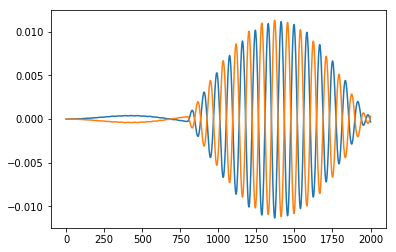

In [46]:
import matplotlib.pyplot as plt

ntimes = len(time_grid)
#plt.plot(time_grid, wavepacket_R[0,:ntimes].imag)
#plt.plot(time_grid, wavepacket_R[1,:ntimes].imag)
#plt.plot(time_grid, wavepacket_R[2,:ntimes].imag)
#plt.plot(time_grid, wavepacket_R[3,:ntimes].imag)

plt.plot(time_grid, dipmom_R[1,:ntimes])
plt.plot(time_grid, dipmom_S[1,:ntimes])